In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy.linalg import eig
from sklearn.decomposition import PCA
import cmath
# import warnings
# warnings.filterwarnings('ignore')

In [110]:
X_test = np.loadtxt("X_test.csv", delimiter=",", dtype=float)
X_train = np.loadtxt("X_train.csv", delimiter=",", dtype=float)
y_test = np.loadtxt("y_test.csv", delimiter=",", dtype=float)
y_train = np.loadtxt("y_train.csv", delimiter=",", dtype=float)


In [127]:
print("unique values in y_train: ", np.unique(y_test))
print("X_test shape: ", X_train.shape)
print("X_test", X_train[-1])

unique values in y_train:  [0. 1. 2. 3. 4.]
X_test shape:  (33724, 16)
X_test [-0.74411947 -0.60770208 -0.68559778  1.3617996   1.7190119   0.37523782
 -0.57969451 -0.52327877  0.35072553  1.47995245 -0.18427706 -0.78223807
  1.75510848 -0.69236201 -0.63593078  0.19805355]


# Visualize

In [112]:
def eigenValues(X):
    eigenValues = []
    eigenVectors = []
    for i in range(len(X)):
        w,v = eig(X[i].reshape((4, 4)))
        w = w.real
        eigenValues.append(w)
        eigenVectors.append(v)
    return np.array(eigenValues), np.array(eigenVectors)

eig_train, vec_train = eigenValues(X_train)

In [113]:
print(eig_train[1])

[-1.59940879 -0.10291153 -0.10291153  1.16590692]


In [114]:
y_0 = np.where(y_train == 0)
y_1 = np.where(y_train == 1)
y_2 = np.where(y_train == 2)
y_3 = np.where(y_train == 3)
y_4 = np.where(y_train == 4)

x_0 = eig_train[y_0]
x_1 = eig_train[y_1]
x_2 = eig_train[y_2]
x_3 = eig_train[y_3]
x_4 = eig_train[y_4]


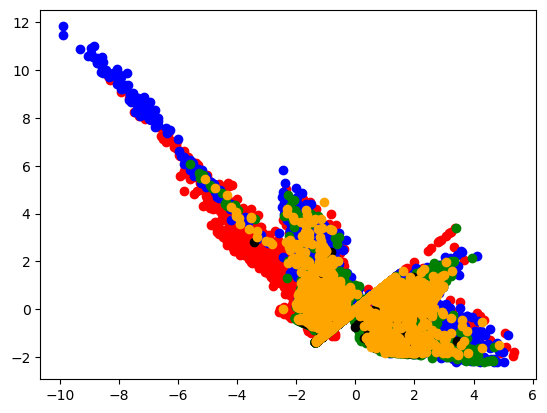

In [115]:
#Scatterplot the first two eigenvalue of each sample in the training set, colored by the class label
plt.scatter([x_0[i][0] for i in range(len(x_0))], 
            [x_0[i][1] for i in range(len(x_0))],
            color='red', label='0')
plt.scatter([x_1[i][0] for i in range(len(x_1))], 
            [x_1[i][1] for i in range(len(x_1))],
            color='blue', label='1')
plt.scatter([x_2[i][0] for i in range(len(x_2))], 
            [x_2[i][1] for i in range(len(x_2))],
            color='green', label='2')
plt.scatter([x_3[i][0] for i in range(len(x_3))], 
            [x_3[i][1] for i in range(len(x_3))],
            color='black', label='3')
plt.scatter([x_4[i][0] for i in range(len(x_4))], 
            [x_4[i][1] for i in range(len(x_4))],
            color='orange', label='3')
plt.show()

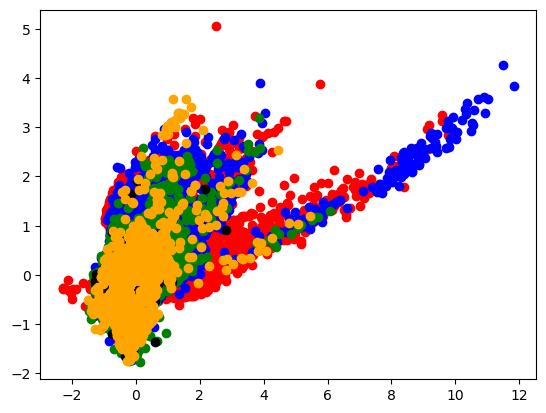

In [116]:
#Scatterplot the first eigenvalue of each sample in the training set, colored by the class label
plt.scatter([x_0[i][0+2] for i in range(len(x_0))], 
            [x_0[i][1+2] for i in range(len(x_0))],
            color='red', label='0')
plt.scatter([x_1[i][0+2] for i in range(len(x_1))], 
            [x_1[i][1+2] for i in range(len(x_1))],
            color='blue', label='1')
plt.scatter([x_2[i][0+2] for i in range(len(x_2))], 
            [x_2[i][1+2] for i in range(len(x_2))],
            color='green', label='2')
plt.scatter([x_3[i][0+2] for i in range(len(x_3))], 
            [x_3[i][1+2] for i in range(len(x_3))],
            color='black', label='3')
plt.scatter([x_4[i][0+2] for i in range(len(x_4))], 
            [x_4[i][1+2] for i in range(len(x_4))],
            color='orange', label='3')
plt.show()

In [130]:
pca = PCA(n_components=4)
pca.fit(eig_train)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
#When we use 3 components, we can explain more than 90% of the variance in the data

[0.65843689 0.19723058 0.09083642 0.05349611]
[0.65843689 0.85566747 0.94650389 1.        ]


# K-mean cluster

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(eig_train)

ValueError: Complex data not supported
[[-1.85020049+0.j          0.08519902+0.j          0.63044488+0.16672322j
   0.63044488-0.16672322j]
 [-1.59940879+0.j         -0.10291153+0.7413745j  -0.10291153-0.7413745j
   1.16590692+0.j        ]
 [ 1.25805955+0.j         -1.36450749+0.j         -0.29483784+0.55013641j
  -0.29483784-0.55013641j]
 ...
 [-2.10162818+0.j          0.9692078 +1.19830159j  0.9692078 -1.19830159j
  -0.15939863+0.j        ]
 [-1.30810836+0.j          0.03657646+0.90152569j  0.03657646-0.90152569j
   1.23320657+0.j        ]
 [-1.82182139+0.j          0.65852025+0.78338187j  0.65852025-0.78338187j
   0.14967575+0.j        ]]
